In [1]:
#! pip install qiskit
#! pip install qiskit_ibm_runtime
#! pip install qiskit[visualization]
#! pip install qiskit_aer

In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

In [3]:
# por default en IBM cada qubit tiene un valor de cero

# q_0 = |0>
# q_1 = |0>
primercircuito = QuantumCircuit(2)

a = QuantumCircuit()
primercircuito.h(0) # hadamard al qubit0

primercircuito.cx(0,1) # compuerta cx

In [4]:
primercircuito.measure_all() # para las mediciones

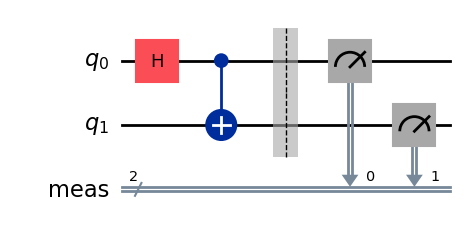

In [5]:
#para graficar el circuito

primercircuito.draw("mpl") #mpl para resolucion tipo LATEX

al inicio |phi_o> = |00>

con la compuerta hadamard se vuelve |$\phi_1$> = H|0> + q1. q1 no ha cambiado

al final el resultado es 1/sqrt(2) * (|00> + |10>)

ahora al aplicar compuerta cx=CNOT= negacion controlada

si el bit de control es 1 se hace el NOT sobre el bit objetivo

si el bit de control es 0, no se hace

en este caso el bit de control es la salida de la hadamard luego de aplicarse sobre q_0

tenemos 1/sqrt(2) * (|00> + |10>), entonces para |00> el qubit de control es el primer cero y el objetivo es el segundo cero, no se hace la negacion, para el |10> el de control es el 1 y el objetivo en cero, entonces este si queda |11> ya que se hace la negacion

In [6]:
# esta libreria instalada es para simular el circuito
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
from qiskit import transpile

In [7]:
sim = AerSimulator()

In [8]:
job = sim.run(transpile(primercircuito,sim), shots=1024) # shots es para decir cuantas veces lo voy a simular

c:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [9]:
# ahora a graficar las propabilidades(distribucion de prob)

conteo = job.result().get_counts(primercircuito)

In [10]:
# otro import para ahora si poder graficar la distribucion
from qiskit.visualization import plot_distribution

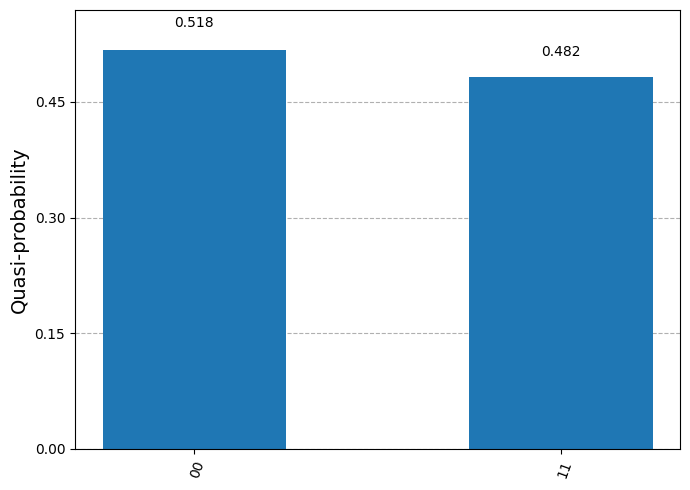

In [11]:
plot_distribution(conteo)

In [12]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Permite mejor calidad en las imágenes generadas.

In [13]:
q = QuantumRegister(1, name='q')

### Identity gate:

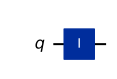

In [14]:
qc = QuantumCircuit(q)
qc.id(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Igate.png')

In [15]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="\\textit{I = }\n")

<IPython.core.display.Latex object>

### Pauli gates

#### $X$: bit-flip gate:

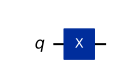

In [16]:
qc = QuantumCircuit(q)
qc.x(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Xgate.png')

In [17]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\textit{X = }\n")

<IPython.core.display.Latex object>

# Testeando compuerta X

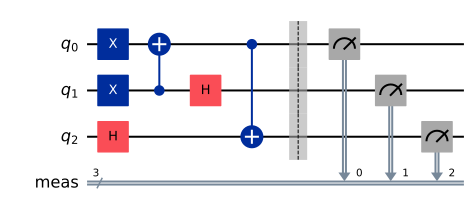

In [36]:
test_circ_1 = QuantumCircuit(3)

test_circ_1.x(0)
test_circ_1.x(1)
test_circ_1.h(2)
test_circ_1.cx(1,0)
test_circ_1.h(1)
test_circ_1.cx(0,2)
test_circ_1.measure_all()
test_circ_1.draw("mpl")

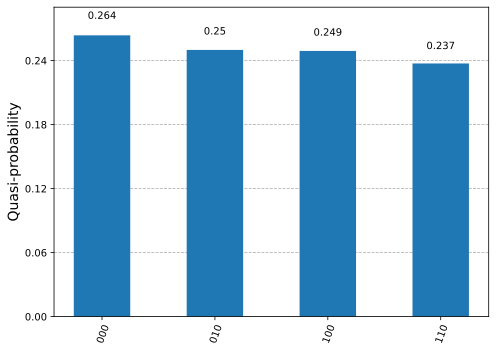

In [37]:
sim = AerSimulator()
job = sim.run(transpile(test_circ_1,sim), shots=1024)
conteo = job.result().get_counts(test_circ_1)
plot_distribution(conteo)

#### $Y$: bit- and phase-flip gate:

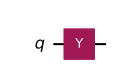

In [20]:
qc = QuantumCircuit(q)
qc.y(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Ygate.png')

In [21]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="\\textit{Y = }\n")

<IPython.core.display.Latex object>

#### $Z$: phase-flip gate:

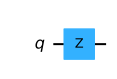

In [22]:
qc = QuantumCircuit(q)
qc.z(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Zgate.png')

In [23]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="\\textit{Z = }\n")

<IPython.core.display.Latex object>

### Clifford gates

#### Hadamard gate:

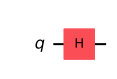

In [24]:
qc = QuantumCircuit(q)
qc.h(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Hgate.png')

In [25]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="\\textit{H = }\n")

<IPython.core.display.Latex object>

# testeando Hadamard

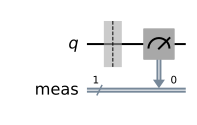

In [45]:
test_circ_4 = QuantumCircuit(1)
test_circ_1.h(0)
test_circ_4.measure_all()
test_circ_4.draw("mpl")

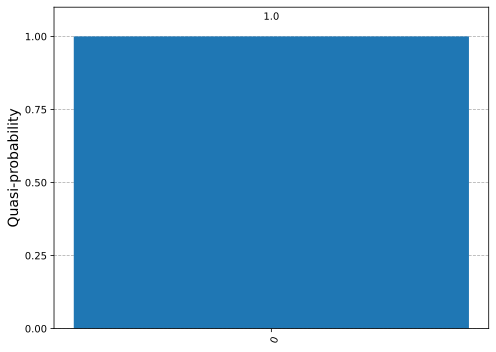

In [50]:
sim = AerSimulator()
job = sim.run(transpile(test_circ_4,sim), shots=1024)
conteo = job.result().get_counts(test_circ_4)
plot_distribution(conteo)

#### $S$ (or, $\sqrt{Z}$ phase) gate:

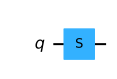

In [26]:
qc = QuantumCircuit(q)
qc.s(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Sgate.png')

In [27]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="\\textit{S = }\n")

<IPython.core.display.Latex object>

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate:

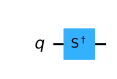

In [28]:
qc = QuantumCircuit(q)
qc.sdg(q)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='SdgGate.png')

In [29]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="S^{\\dagger} =\n")


<IPython.core.display.Latex object>

#### $T$ (or, $\sqrt{S}$ phase) gate:

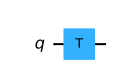

In [30]:
qc = QuantumCircuit(q)
qc.t(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Tgate.png')

In [31]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="\\textit{T = }\n")

<IPython.core.display.Latex object>

#### $T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate:

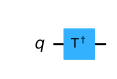

In [32]:
qc = QuantumCircuit(q)
qc.tdg(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='TdgGate.png')

In [33]:
unitary = Operator(qc)

array_to_latex(unitary, prefix="T^{\\dagger} = \n")

<IPython.core.display.Latex object>

In [34]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version
from IPython.display import display, Math
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 2.2.1
IBM RunTime Version: 0.42.0
Qiskit_Aer Version: 0.17.2
Python Version: 3.11.13
2025 ©
